# Prediction of ratings based on given data

Ram charan Reddy Kankanala

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from scipy.stats import zscore
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("2020-XTern-DS.csv")

In [4]:
data

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,-,-,-,30 minutes


In [5]:
# Checking for null values
data.isnull().sum() 

Restaurant       0
Latitude         0
Longitude        0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Cook_Time        0
dtype: int64

In [100]:
#Data preparation by removing restaurants with 'NEW' or 'Opening soon' rating and replacing - with 0
ratingdata = data[data["Rating"] != 'NEW']
ratingdata = ratingdata[ratingdata["Rating"] != 'Opening Soon']
ratingdata = ratingdata.replace(r'-', 0 , regex=True)
ratingdata.drop(['Restaurant'],axis=1,inplace=True)

In [101]:
# Removing $ symbol and minutes from cook time
ratingdata['Average_Cost'] = ratingdata['Average_Cost'].str.replace(',', '.')
ratingdata['Average_Cost'] = ratingdata['Average_Cost'].str.replace('$', '')
ratingdata['Minimum_Order'] = ratingdata['Minimum_Order'].str.replace('$', '')
ratingdata['Cook_Time'] = ratingdata['Cook_Time'].str.replace(' minutes', '')
#ratingdata['Average_Cost'] = ratingdata['Average_Cost'].astype(float)

In [102]:
ratingdata

,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.00,50.00,3.5,12,4,30
1,39.775933,-85.740581,"Ice Cream, Desserts",10.00,50.00,3.5,11,4,30
2,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.00,50.00,3.6,99,30,65
3,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.00,99.00,3.7,176,95,30
4,39.882284,-85.517407,"Cafe, Beverages",20.00,99.00,3.2,521,235,65
...,...,...,...,...,...,...,...,...,...
2013,39.764745,-85.121567,Bengali,20.00,50.00,3.3,16,6,30
2014,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",40.00,0.00,0,0,0,30
2015,39.133719,-85.503020,"Awadhi, Bihari",40.00,99.00,4.1,118,91,30
2017,39.301765,-85.662768,"Kebab, Fast Food",10.00,50.00,0,0,0,30


In [147]:
# X and y
X=ratingdata.drop('Rating',axis=1)
y=ratingdata['Rating']

In [148]:
# Spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
X.isnull().sum()

Latitude         0
Longitude        0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Votes            0
Reviews          0
Cook_Time        0
dtype: int64

In [150]:
# checking for number of cuisines in each row
ratingdata.Cuisines.value_counts()

North Indian                               140
North Indian, Chinese                      114
Fast Food                                   81
South Indian                                58
Chinese                                     34
                                          ... 
Fast Food, Pizza, North Indian, Momos        1
Momos, Tibetan, Beverages                    1
Sandwich, Chinese, Fast Food, Beverages      1
Bakery, Desserts, Sandwich                   1
European, American, Bakery, Salad            1
Name: Cuisines, Length: 690, dtype: int64

In [151]:
# creating new no of cuisines columns 
X_train['no_of_cuisines'] = data.Cuisines.str.count(',')+1
X_test['no_of_cuisines'] = data.Cuisines.str.count(',')+1
X_train.drop(['Cuisines'],axis=1,inplace=True)
X_test.drop(['Cuisines'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [152]:
X_train = X_train.applymap(float)
X_test = X_test.applymap(float)
X_train.corr()

,Latitude,Longitude,Average_Cost,Minimum_Order,Votes,Reviews,Cook_Time,no_of_cuisines
Latitude,1.000000,0.001608,0.022546,-0.015871,0.025799,0.021317,0.008187,0.007757
Longitude,0.001608,1.000000,0.008465,0.015142,-0.022865,-0.021254,-0.033356,0.033826
Average_Cost,0.022546,0.008465,1.000000,0.228372,0.409216,0.435215,0.214460,0.352730
Minimum_Order,-0.015871,0.015142,0.228372,1.000000,0.143682,0.150048,0.228357,0.028210
Votes,0.025799,-0.022865,0.409216,0.143682,1.000000,0.964198,0.209086,0.265908
Reviews,0.021317,-0.021254,0.435215,0.150048,0.964198,1.000000,0.187264,0.255455
Cook_Time,0.008187,-0.033356,0.214460,0.228357,0.209086,0.187264,1.000000,0.138663
no_of_cuisines,0.007757,0.033826,0.352730,0.028210,0.265908,0.255455,0.138663,1.000000


In [153]:
X_train.drop(['Minimum_Order','Latitude','Longitude','Cook_Time'],axis=1,inplace=True)
X_test.drop(['Minimum_Order','Latitude','Longitude','Cook_Time'],axis=1,inplace=True)

In [154]:
y_test = [float(i) for i in y_test]

In [155]:
train_scale = X_train
test_scale = X_test

In [156]:
# prediction from decision tree
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(train_scale,y_train)
dt_pred=dt.predict(test_scale)
print('RMSE score through Decision tree regression : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(dt_pred,decimals=1))))

RMSE score through Decision tree regression :  0.5366398241697645


In [157]:
# prediction from RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(train_scale,y_train)
rf_pred=rf.predict(test_scale)
print('RMSE score through Random Forest : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(rf_pred,decimals=1))))

RMSE score through Random Forest :  0.4748916970150197


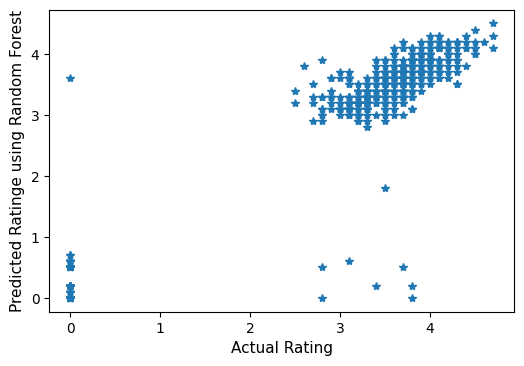

In [158]:
# results plots
plt.figure(figsize=(6,4),dpi=100)
plt.plot(np.array(y_test),np.round(rf_pred,decimals=1),'*')
plt.xlabel('Actual Rating',size=11)
plt.ylabel('Predicted Ratinge using Random Forest',size=11)
plt.show()

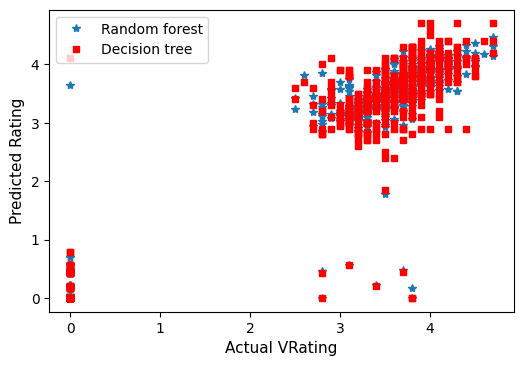

In [159]:
# results comparision plots
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test,rf_pred,'*',label='Random forest')
plt.plot(y_test,dt_pred,'o',color='red',label='Decision tree',marker='s',markersize=4)
plt.legend()
plt.xlabel('Actual VRating',size=11)
plt.ylabel('Predicted Rating',size=11)
plt.show()